Describe the structure of an artificial neuron. How is it similar to a biological neuron? What
are its main components?

Artifical neuron looks like <br> <br>
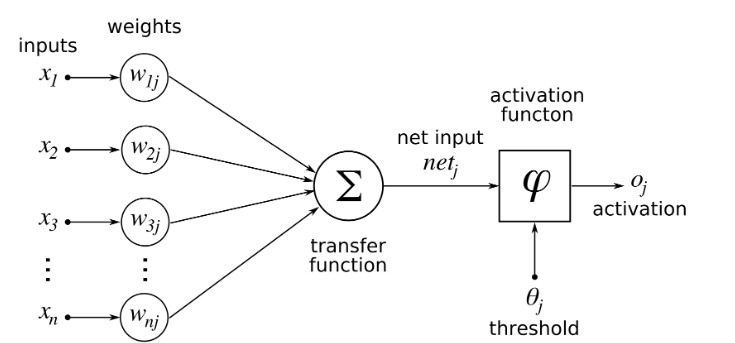

In [ ]:
"""
It is similar to the biological neuron in terms of how it does things for example in the biological neuron the electical signal is received at one end and the output is obtained 
if the neuron is activated as a result of the signal being strong enough. Similarly in ANN to we have the input and after processing if is significant enough to produce a 
certain threshold output the neuron is considered to be active and output from it is considered in calculating the overall output. In ANN we have Artificial neuron, 
we have a input portion which is multiplied to a weight then aggregated and passed thought a activation function which fires(output 1) or doesn't(output 0).
"""

What are the different types of activation functions popularly used? Explain each of them.

In [ ]:
"""
There are 3 type of activation functions:
1. binary step functions :- uses a threshold value gives binary output(to say neuron is activated or not)
2. linear function :- its a identity function where the activation is directly proportional to the input
3. non linear activation functions :- for working with complex data we need non linear activation function to find complex mappings between input and ouput for which 
these are used.

commonly use activation functions:-
sigmoid, tanh, ReLU, LeakyReLU, softmax function



"""

Explain, in details, Rosenblatt’s perceptron model. How can a set of data be classified using a
simple perceptron?

In [ ]:
"""
It is a model similar to or based on the McColloch & Pitts model of artificial neuron but with an extra constant input associated with a synaptic weight b known as bias.
Here it is just the negative of the activatino threshold. Also the weights are not restricted to unity but rather can be more allowing inputs to have different level of 
influence on neuron's output. The effects of an input can also be a inhibitory influence rather than just strictly positive.

"""

Use a simple perceptron with weights w 0 , w 1 , and w 2  as −1, 2, and 1, respectively, to classify
data points (3, 4); (5, 2); (1, −3); (−8, −3); (−3, 0).

In [1]:
"""
The formula is to y = sum(wixi) + w0:
for point (3,4) the value of y is more than 0 so it will be in class 1
for point (5,2) the value of y is again more then 0 so it will be in class 1
for the rest 3 points the values are negative for y therefore  the class is 0
"""

'\nThe formula is to y = sum(wixi) + w0:\nfor point (3,4) the value of y is more than 0 so it will be in class 1\nfor point (5,2) the value of y is again more then 0 so it will be in class 1\nfor the rest 3 points the values are negative for y therefore  the class is 0\n'

Explain the basic structure of a multi-layer perceptron. Explain how it can solve the XOR
problem.

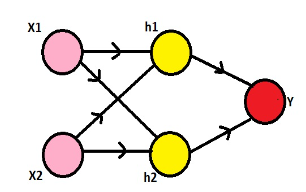

In [ ]:
"""
The above is the multi-layer perceptron which can be used to implement A XOR B, here what we do is that "(A AND NOT B)OR(B AND NOT A)" both both right and left of OR are solved 
in a hidden neuron node and the Y node performs the OR operation.
"""

What is artificial neural network (ANN)? Explain some of the salient highlights in the
different architectural options for ANN.

In [ ]:
"""
An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. 
They are computational model that consists of several processing elements that receive inputs and deliver outputs based on their predefined activation functions.

different architectural options for ANN are:
1. single-layer feed forward network (no hidden layer just input and output layer where the processing happens at output layer)
2. multilayer feed forward network (contains hidden layer makes it computationally stronger and extact complex patterns)
3. single node with its own feedback (contains single node with feedback network with its successive neuron which can be output)
4. single layer recurrent network (contains layer of neurons with feed back mechanims to iteself or other processing nodes)
5. multilayer recurrent network (stores sequences of information and some neuron do not need input at each time step due to output of other nodes serve as input)
"""

Explain the learning process of an ANN. Explain, with example, the challenge in assigning
synaptic weights for the interconnection between neurons? How can this challenge be
addressed?

In [ ]:
"""
An ANN network starts with a random set of weights and biases, when the input layer gets the input data it goes through the hidden layers where processing takes place
(product with weight and adding it to bias) after this it is passed through activation function then that output is transfeered to successive layer/output layer. 
at the output layer during the learning process the output is compared with actual output to find out the error, which is then given to a loss/cost function which calculated the 
to which the weights and bias needs to be updated. This is then backpropogated in reverse of the flow input followed meaning form output layer towards input layer. 
after updates take place its 1 epoch, many such epochs take place until we have a low error value or max epochs is reached.
"""

Explain, in details, the backpropagation algorithm. What are the limitations of this
algorithm?

In [ ]:
"""
ANN use backpropogation as learning algorithm to compute a gradient descent with repect to weight values of various inputs. Comparing desired outputs to calculated outputs, 
the systems are tuned by adjusted connection weights to narrow the difference between the 2 as much as possible.
Limitations:
1. Training is time and rosource intensive.
2.  Performance is highly dependent on input data.
3. sensitive to noise and irregularities.
"""

Describe, in details, the process of adjusting the interconnection weights in a multi-layer
neural network.

In [ ]:
"""
In a multi-layer neural network when we use the backpropogation algorithm to adjust weights during the training process with some value of learning rate. 
The Signal is compared with the expected value. The computed errors are propagated backwards from the output to the preceding layer. The error propagated back 
are used to adjust the interconnection weights between the layers.
The image below illustrates the formula used for updation of weights and biases, the partial derivative of the cost function is used in these values to be calculated, 
and the alpha is the learning rate.
"""

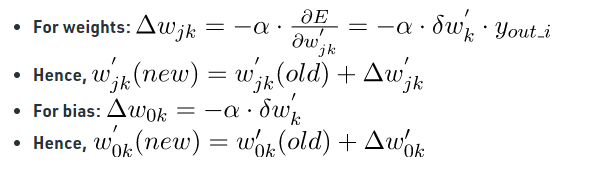

What are the steps in the backpropagation algorithm? Why a multi-layer neural network is
required?

In [ ]:
"""
1. Input is provided to the network from input layer which passes through the network in defined interconnected paths.
2. These then are precessed using weights which are choosen randomly and after that passed through an activation function.
3. the output of this network is then compared with the expected output in order to obtain the error.
4. using the loss/cost function we calculate how much the weights of the layers needs to be adjusted for better results.
5. this value is then sent back and passess layer by layer through all the neurons updating the weights.
6. all this comes under just 1 epoch which is then repeated until desired output is achieved(error is minimized).
Note:- A hyperparameter called the learning rate defines how much the backpropogation can affect the weights during the training process, 
and this cannot be to high or too low.

There are many limitations in the single layer NNs like how it only can solve linear problems, can't find complex patterns and relationships from the data, etc.
All these are handled by the Multi layer neuron networks to a certain expects as the hidden layers are just so that we can handle the complex non linear data and gain 
more insight and generate better output.
"""

Write short notes on:<br><br>

1. Artificial neuron<br>
2. Multi-layer perceptron<br>
3. Deep learning<br>
4. Learning rate

In [ ]:
"""
Multi layer perceptron:- this is a type of ANN architecture where we have other layers in between of the input and output layer which are used to find complex patters and 
insights from the data and give more refined output. These layers are called hidden layers and they are similar to ouput layer as they also have weights and bias in them 
whose output after calculation are given to a activation function and feed forwarded to the next layer as input.

Deepp learning:- The brach of AI which used the Artificial neurons in order to make data driven intelectual computers enabling them to make intelligence based decision. 
It is a black box learning technique where the programmer can not interpret how the network is producing the output by giving those certian values to the different parameters, 
but can only define the architecture of how everythings will go down.
"""

Write the difference between:-<br><br>

1. Activation function vs threshold function<br>
2. Step function vs sigmoid function<br>
3. Single layer vs multi-layer perceptron

In [ ]:
"""
step function vs sigmoid function:
The below graph are to illustrate the difference btw the step funciton and sigmoid function. The step function works of the basic idea of the value being below of more 
than threshold and gives 0 and 1 as respective output but is not differentiable which is a problem while working with algoritms like gradient descent where as the sigmoid function 
is differentiable in nature
"""

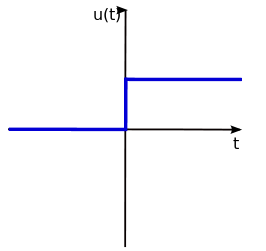
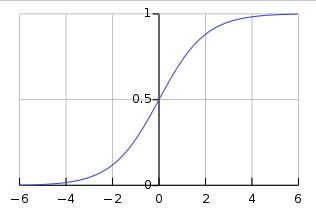

In [ ]:
"""
Threshold function is a type of activation function which works with a threshold value where the output is 0 is the value is less then threshold and 1 for more than 1,
where as a activation function contains many other algorithm to work with different kinds of problem where as threshold function are only good for binary classification tasks.
"""